TOTAL DEMAND

       Bulan  Demand PIKJ (ton)  Demand Offtaker (ton)  \
0   Jan 2024              117.0                    101   
1   Feb 2024               75.0                    103   
2   Mar 2024               87.0                    101   
3   Apr 2024               48.0                    105   
4   May 2024               42.0                    102   
5   Jun 2024               84.0                    101   
6   Jul 2024               63.0                    104   
7   Aug 2024               87.0                    102   
8   Sep 2024               99.0                    102   
9   Oct 2024              102.0                    102   
10  Nov 2024               78.0                    104   
11  Dec 2024              117.0                    105   

    Population Growth (ton)  Total Demand (ton)  
0                269.094469          487.094469  
1                269.631934          447.631934  
2                270.170471          458.170471  
3                270.710082          423.7100

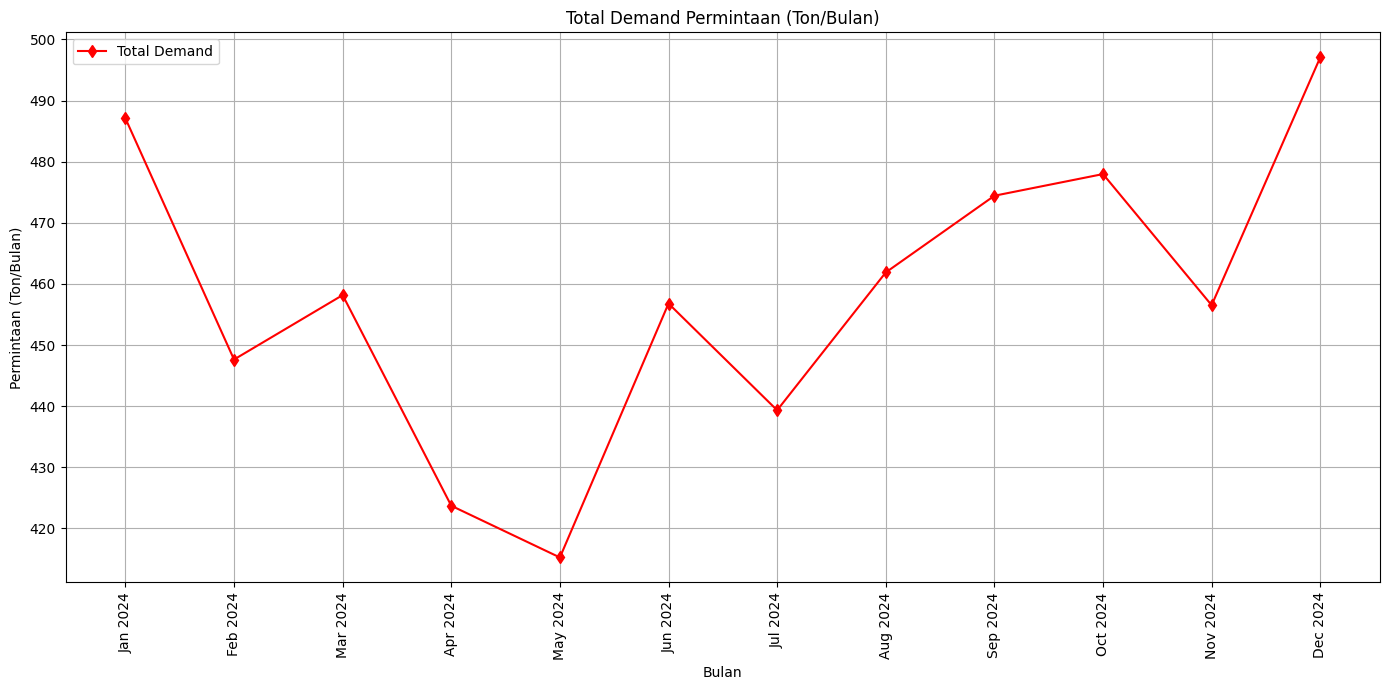

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca file Excel untuk offtaker
file_path1 = '/content/data permintaan cabai.xlsx'
#file_path1 = '/content/drive/MyDrive/data permintaan cabai.xlsx'
df_PIKJ = pd.read_excel(file_path1)

file_path2 = '/content/data oftaker.xlsx'
#file_path2 = '/content/drive/MyDrive/data oftaker.xlsx'
df_oftaker = pd.read_excel(file_path2)

# Ambil kolom 'Permintaan (kg)' dan konversi ke ton
total_demand_PIKJ = (df_PIKJ['Permintaan'] / 1000).tolist()  # Konversi ke ton

# Tahap 1: Hitung distribusi probabilitas
Total_Demand_Sum_PIKJ = sum(total_demand_PIKJ)
probabilities_PIKJ = [d / Total_Demand_Sum_PIKJ for d in total_demand_PIKJ]

# Tahap 2: Hitung distribusi probabilitas kumulatif
kumulatif_probabilitas_PIKJ = np.cumsum(probabilities_PIKJ)

# Tahap 3: Tetapkan interval angka acak
random_interval_PIKJ = [(kumulatif_probabilitas_PIKJ[i-1] if i > 0 else 0, kumulatif_probabilitas_PIKJ[i]) for i in range(len(kumulatif_probabilitas_PIKJ))]

# PIKJ
# Fungsi untuk membangkitkan permintaan berdasarkan angka acak
def generate_demand_PIKJ(random_number=None):
    if random_number is None:
        random_number = np.random.random()
    for i, (low, high) in enumerate(random_interval_PIKJ):
        if low <= random_number < high:
            return total_demand_PIKJ[i]

# Simulasi permintaan untuk 12 bulan ke depan
forecasted_demand2024_PIKJ = [generate_demand_PIKJ() for _ in range(12)]

# Pengali untuk permintaan PIKJ dari Sumedang (0.5 ton)
multiplier = 0.5
forecasted_demand2024_PIKJ = [demand * multiplier * 60 for demand in forecasted_demand2024_PIKJ]

#OFTAKER
# Ambil kolom 'Permintaan (kg)' dan konversi ke list
total_demand_oftaker = df_oftaker['Permintaan Oftaker'].tolist()

# Tahap 1: Hitung distribusi probabilitas
Total_Demand_Sum_oftaker = sum(total_demand_oftaker)
probabilities_oftaker = [d / Total_Demand_Sum_oftaker for d in total_demand_oftaker]

# Tahap 2: Hitung distribusi probabilitas kumulatif
kumulatif_probabilitas_oftaker = np.cumsum(probabilities_oftaker)

# Tahap 3: Tetapkan interval angka acak
random_interval_oftaker = [(kumulatif_probabilitas_oftaker[i-1] if i > 0 else 0, kumulatif_probabilitas_oftaker[i]) for i in range(len(kumulatif_probabilitas_oftaker))]

# Fungsi untuk membangkitkan permintaan berdasarkan angka acak
def generate_demand_oftaker(random_number=None):
    if random_number is None:
        random_number = np.random.random()
    for i, (low, high) in enumerate(random_interval_oftaker):
        if low <= random_number < high:
            return total_demand_oftaker[i]

# Simulasi permintaan untuk 12 bulan ke depan (forecast)
forecasted_demand2024_oftaker = [generate_demand_oftaker() for _ in range(12)]

# Pertumbuhan populasi
A = 0.002
B = 0.00000001
N = np.zeros(12)
N[0] = 1167033
N[0] = N[0] * 0.63 * 0.000366  # Faktor koreksi

# Bulan dari Juli 2023 sampai Juni 2024
months_future = ['Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', 'Jun 2024',
                 'Jul 2024', 'Aug 2024', 'Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024',]

# Compute Population Growth
for k in range(1, 12):
    X = (1 + A - (B * N[k-1])) * N[k-1]
    N[k] = X

# Penjumlahan ketiga permintaan (per bulan)
total_per_month = []
for i in range(12):
    total_demand_per_month = forecasted_demand2024_oftaker[i] + forecasted_demand2024_PIKJ[i] + N[i]
    total_per_month.append(total_demand_per_month)

# Membuat tabel dengan DataFrame
df_total_demand = pd.DataFrame({
    'Bulan': months_future,
    'Demand PIKJ (ton)': forecasted_demand2024_PIKJ,
    'Demand Offtaker (ton)': forecasted_demand2024_oftaker,
    'Population Growth (ton)': N,
    'Total Demand (ton)': total_per_month
})

# Menampilkan tabel
print(df_total_demand)

# Visualisasi tabel dalam grafik
plt.figure(figsize=(14, 7))

# Plot hasil penjumlahan
plt.plot(months_future, total_per_month, marker='d', linestyle='-', color='red', label='Total Demand')

# Set label sumbu x
plt.xticks(ticks=np.arange(len(months_future)), labels=months_future, rotation=90)

# Tambahkan judul dan label sumbu
plt.title('Total Demand Permintaan (Ton/Bulan)')
plt.xlabel('Bulan')
plt.ylabel('Permintaan (Ton/Bulan)')

# Tambahkan grid dan legenda
plt.grid(True)
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()

**Prediksi Luas Tanam Pada Kelompok Tani di Sumedang**

In [ ]:
import numpy as np
import pandas as pd

# Data historis luas tanam dari file
file_path = '/content/Rekap Luas Tanam 13PokTan.xlsx'
df = pd.read_excel(file_path)

# Nama-nama kelompok petani
kelompok_tani = [
    'Bina Bakti Mandiri', 'Buana Tani', 'Makmur', 'Mekar Rahayu 1', 'Sri Mukti',
    'Dangiang Tani Abadi', 'Mekar Rahayu 2', 'Mitra Abadi', 'Tani Mukti',
    'Simpati Mukti', 'Harapan Makmur 1', 'Harapan Makmur 2', 'Subur Tani'
]

# Dictionary untuk menyimpan data tiap kelompok
kelompok_data = {kelompok: df[kelompok].tolist() for kelompok in kelompok_tani}

# Fungsi untuk menghitung distribusi probabilitas kumulatif dan interval angka acak
def hitung_probabilitas_kumulatif(luastanam):
    total_produksi = sum(luastanam)
    probabilities = [d / total_produksi for d in luastanam]
    kumulatif_probabilitas = np.cumsum(probabilities)
    random_interval = [(kumulatif_probabilitas[i-1] if i > 0 else 0, kumulatif_probabilitas[i]) for i in range(len(kumulatif_probabilitas))]
    return random_interval

# Fungsi untuk membangkitkan produksi berdasarkan angka acak
def generate_produksi(random_number, luastanam, random_interval):
    for i, (low, high) in enumerate(random_interval):
        if low <= random_number < high:
            return luastanam[i]

# Prediksi tiap kelompok
hasil_prediksi = {}
for kelompok, luastanam in kelompok_data.items():
    # Hitung distribusi probabilitas kumulatif
    random_interval = hitung_probabilitas_kumulatif(luastanam)

    # Tetapkan angka acak tetap untuk prediksi berdasarkan historis
    fixed_random_numbers = np.random.random(len(luastanam))
    forecasted_historis = [generate_produksi(num, luastanam, random_interval) for num in fixed_random_numbers]

    # Prediksi satu tahun ke depan dengan simulasi Monte Carlo
    random_numbers2024 = np.random.random(12)
    forecasted_2024 = [generate_produksi(num, luastanam, random_interval) for num in random_numbers2024]

    hasil_prediksi[kelompok] = {
        'forecasted_historis': forecasted_historis,
        'forecasted_2024': forecasted_2024
    }

# Buat DataFrame untuk hasil prediksi
data_historis = {}
data_2024 = {}

for kelompok, prediksi in hasil_prediksi.items():
    # Simpan prediksi historis dan 2024 dalam dictionary
    data_historis[kelompok] = prediksi['forecasted_historis']
    data_2024[kelompok] = prediksi['forecasted_2024']

# Buat DataFrame dari dictionary
df_historis = pd.DataFrame(data_historis, index=[f"Bulan {i+1}" for i in range(len(list(data_historis.values())[0]))])
df_2024 = pd.DataFrame(data_2024, index=[f"Bulan {i+1}" for i in range(12)])

# Tampilkan hasil dalam bentuk tabel
print("Tabel Prediksi Luas Tanam 2023 (hektar):")
print(df_historis)
print("\nTabel Prediksi Luas Tanam 2024 (hektar):")
print(df_2024)

Tabel Prediksi Luas Tanam 2023 (hektar):
          Bina Bakti Mandiri  Buana Tani  Makmur  Mekar Rahayu 1  Sri Mukti  \
Bulan 1               1.7010      1.8255  1.9785          2.8375      1.617   
Bulan 2               1.7010      3.0425  3.9570          1.1350      5.390   
Bulan 3               2.5515      1.2170  5.9355          1.1350      8.085   
Bulan 4               4.2525      1.8255  1.9785          0.3405      1.078   
Bulan 5               1.7010      1.8255  9.8925          1.7025      1.078   
Bulan 6               1.7010      3.0425  1.1871          1.7025      2.695   
Bulan 7               4.2525      1.8255  5.9355          0.3405      1.617   
Bulan 8               1.7010      1.8255  9.8925          2.8375     13.475   
Bulan 9               1.7010      1.2170  9.8925          2.8375     13.475   
Bulan 10              2.5515      0.6085  9.8925          2.8375     13.475   
Bulan 11              2.5515      1.2170  9.8925          0.2270     13.475   
Bulan 12   

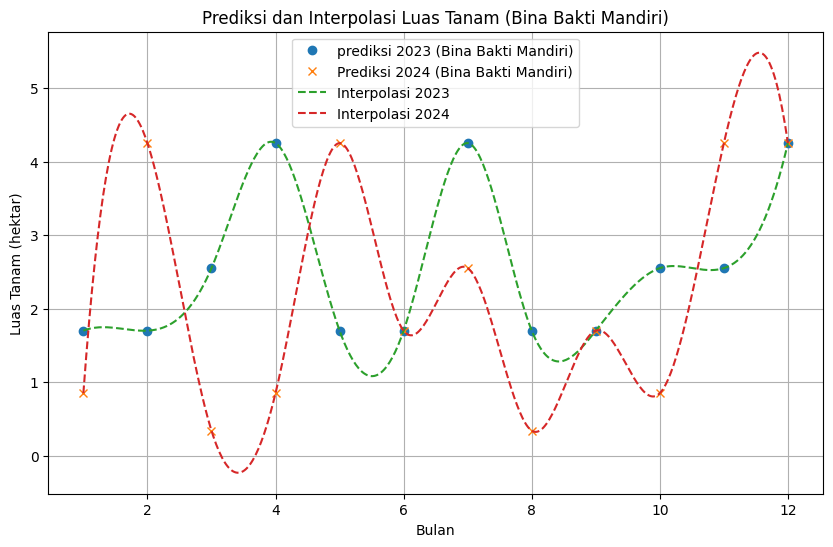

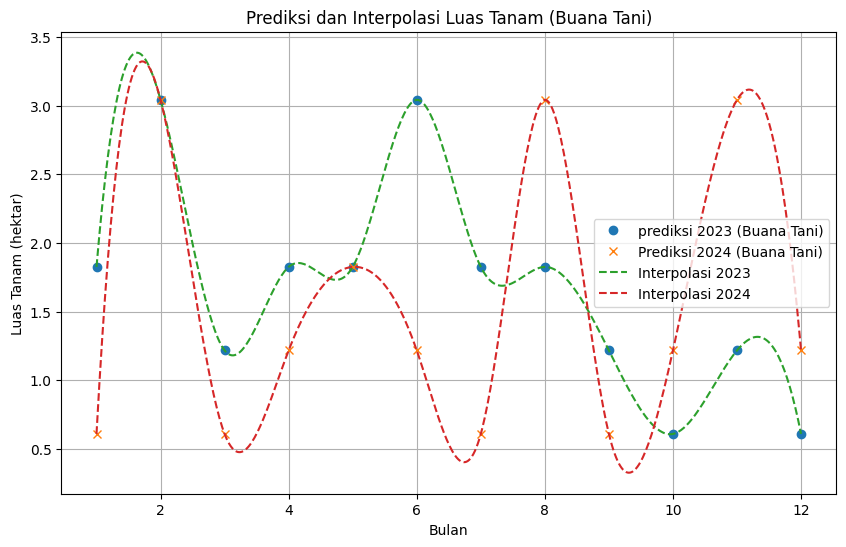

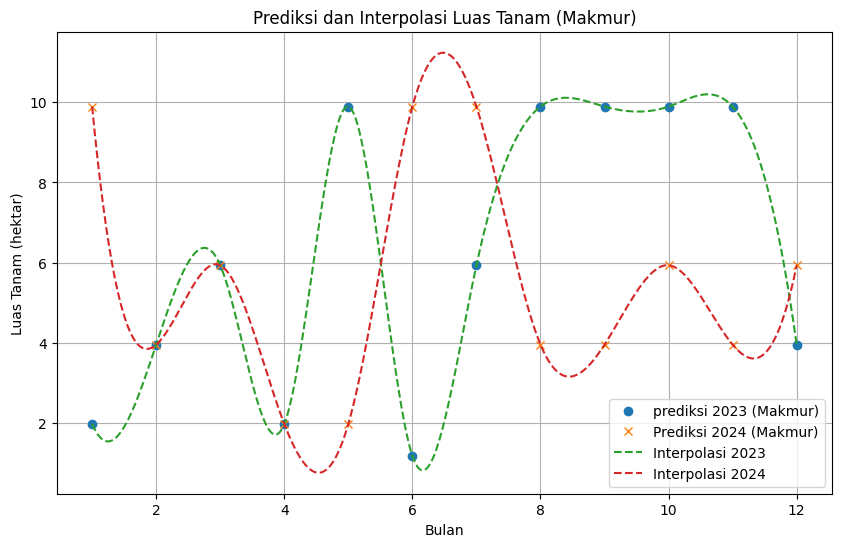

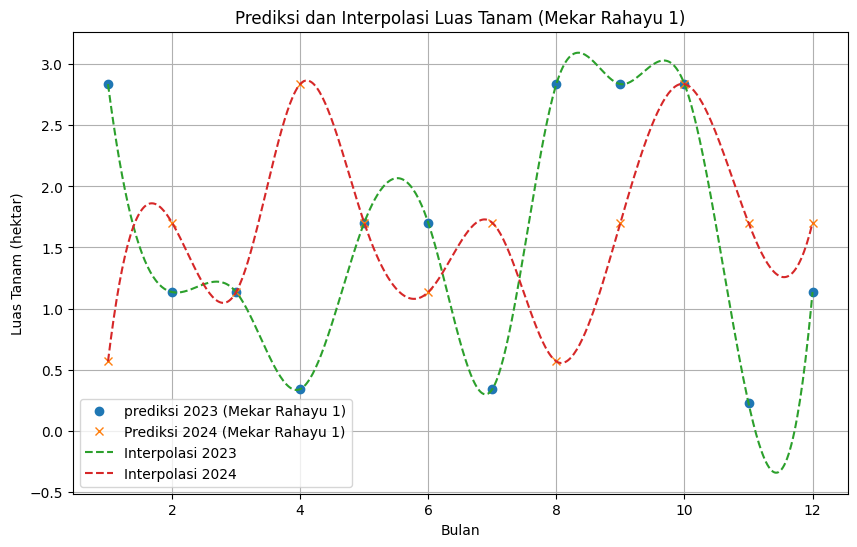

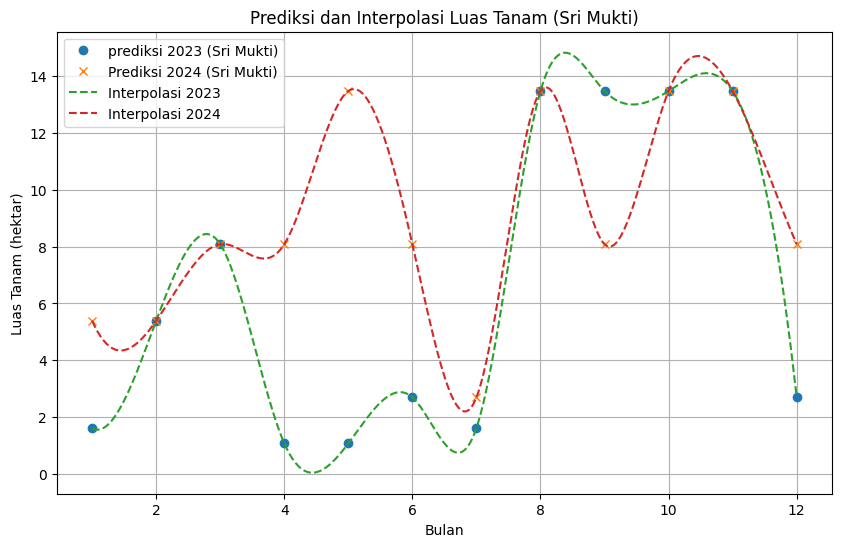

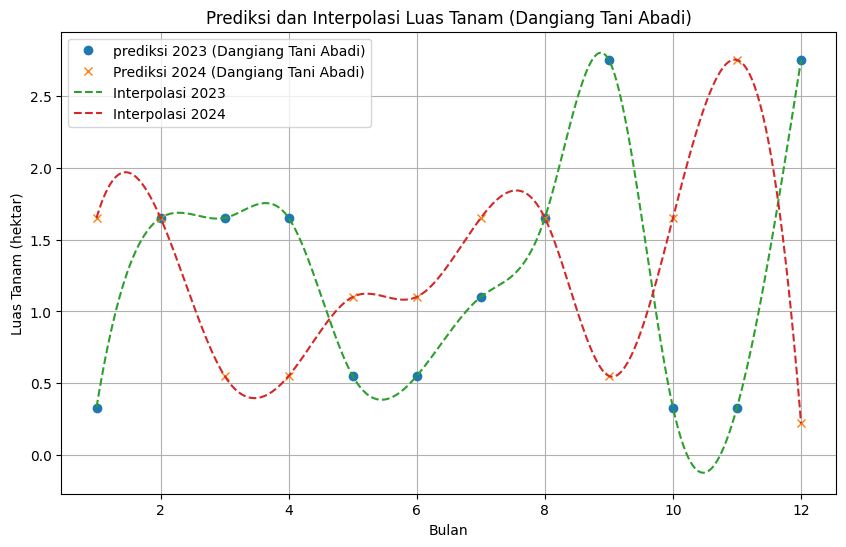

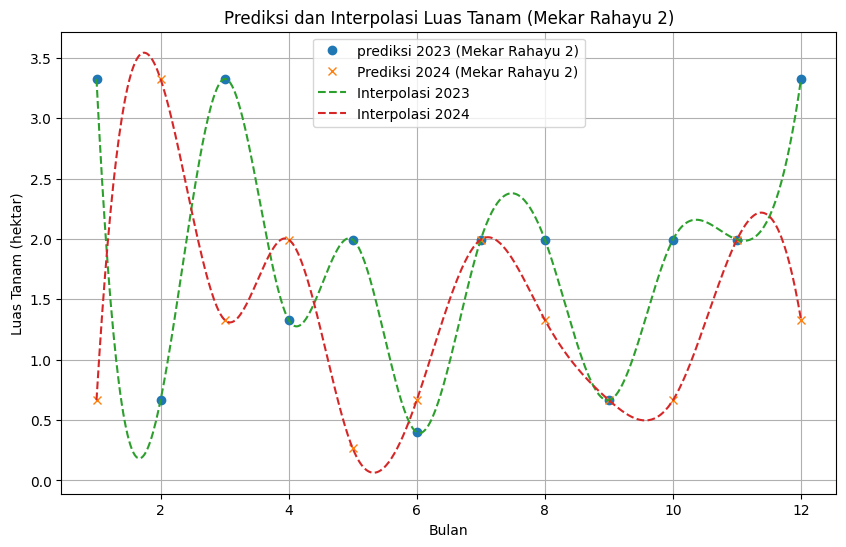

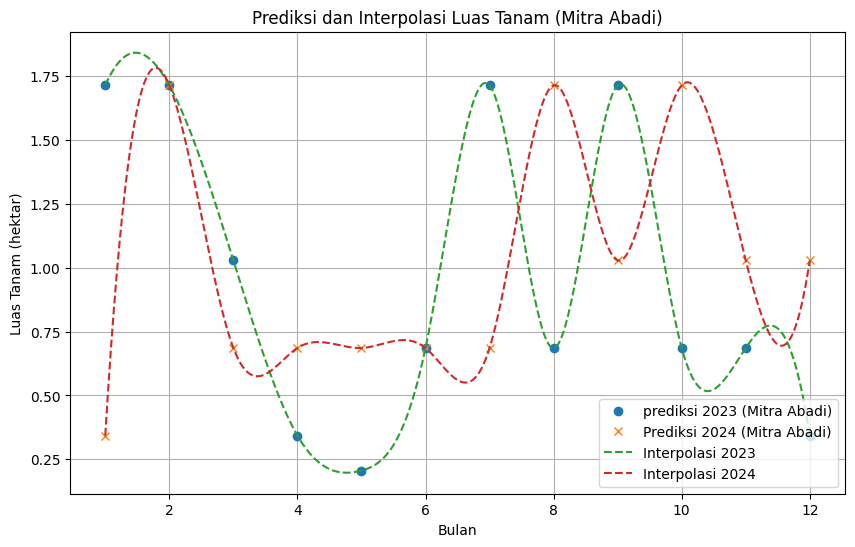

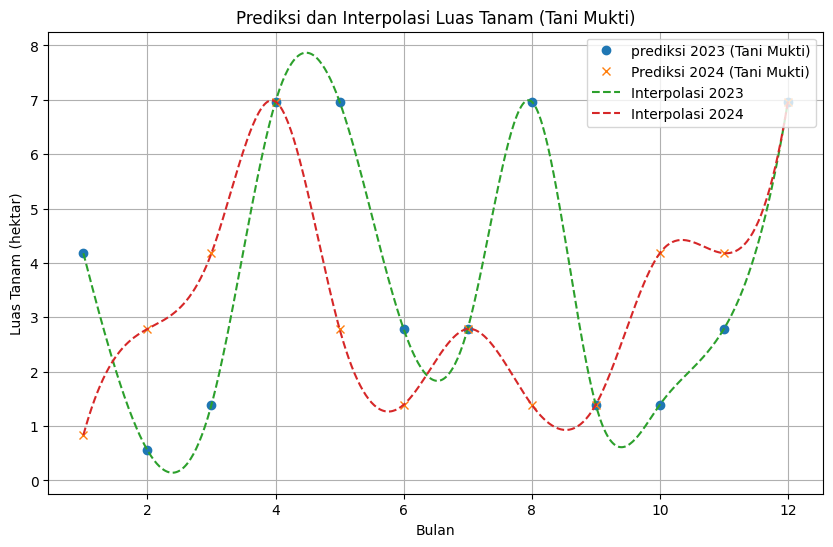

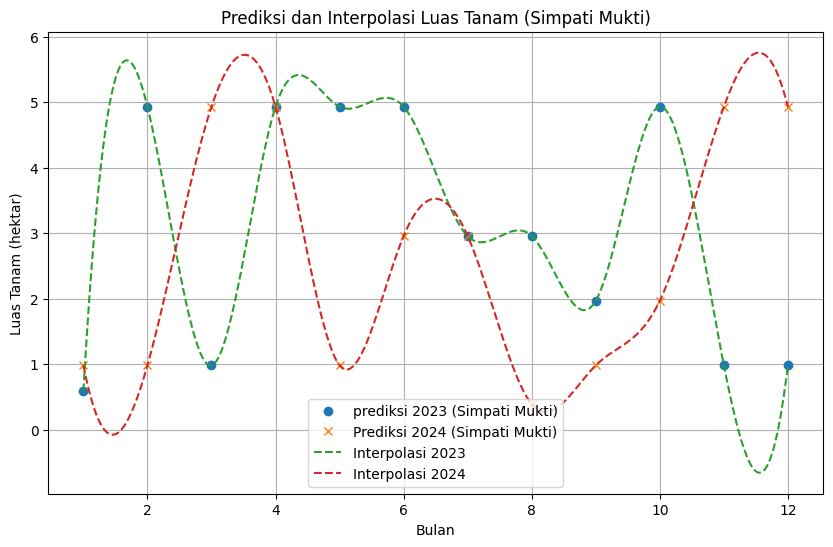

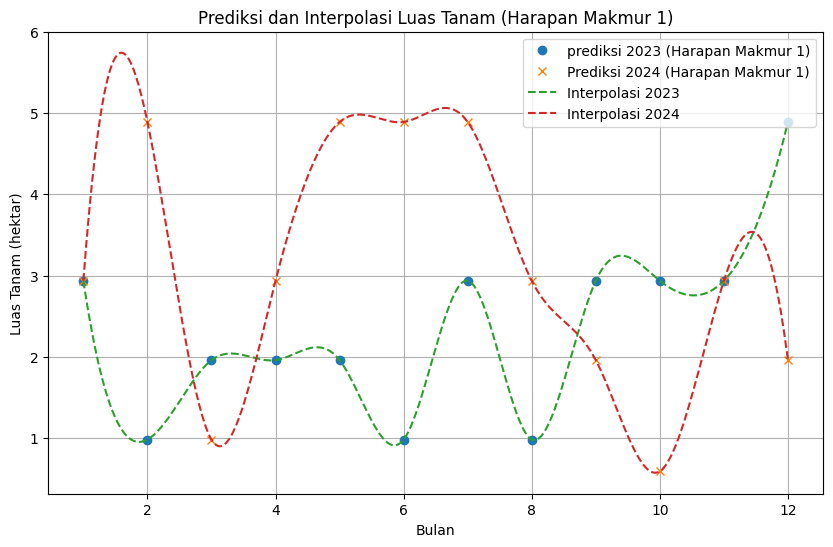

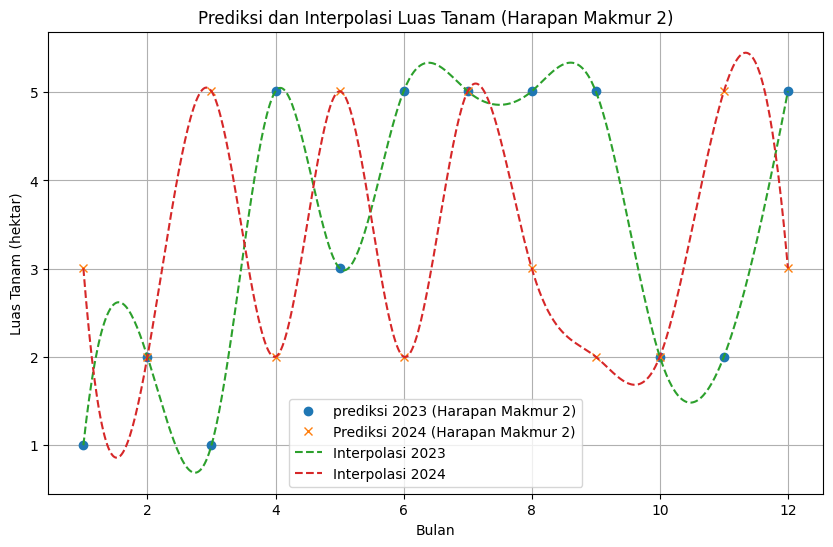

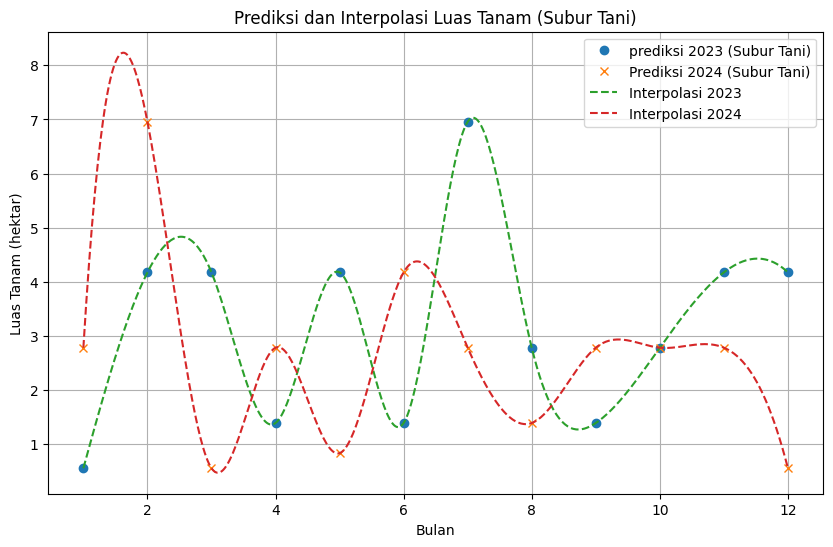

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Plot grafik dengan interpolasi untuk tiap kelompok
for kelompok, prediksi in hasil_prediksi.items():
    # Data untuk 2023 (historis) dan 2024 (prediksi)
    bulan_2023 = np.arange(1, len(prediksi['forecasted_historis']) + 1)
    bulan_2024 = np.arange(1, 13)

    # Interpolasi data historis dan prediksi 2024
    f_2023 = interp1d(bulan_2023, prediksi['forecasted_historis'], kind='cubic')
    f_2024 = interp1d(bulan_2024, prediksi['forecasted_2024'], kind='cubic')

    # Buat grafik untuk 2023 (historis) dan 2024 (prediksi)
    plt.figure(figsize=(10, 6))
    plt.plot(bulan_2023, prediksi['forecasted_historis'], 'o', label=f"prediksi 2023 ({kelompok})")
    plt.plot(bulan_2024, prediksi['forecasted_2024'], 'x', label=f"Prediksi 2024 ({kelompok})")

    # Plot interpolasi
    bulan_2023_interpolasi = np.linspace(1, len(prediksi['forecasted_historis']), 500)
    bulan_2024_interpolasi = np.linspace(1, 12, 500)

    plt.plot(bulan_2023_interpolasi, f_2023(bulan_2023_interpolasi), '--', label='Interpolasi 2023')
    plt.plot(bulan_2024_interpolasi, f_2024(bulan_2024_interpolasi), '--', label='Interpolasi 2024')

    # Judul dan label
    plt.title(f"Prediksi dan Interpolasi Luas Tanam ({kelompok})")
    plt.xlabel('Bulan')
    plt.ylabel('Luas Tanam (hektar)')
    plt.legend()
    plt.grid(True)

    # Tampilkan grafik
    plt.show()

Penerapan Time Delay Distribution

In [ ]:
import numpy as np
import pandas as pd

# Fungsi untuk simulasi delay dan panen bertahap lintas tahun
def simulate_harvest_cross_years(input_areas, plr, productivity, total_months=12):
    # Menyimpan hasil panen tiap bulan untuk dua tahun
    harvest_schedule_2024 = np.zeros(total_months)
    harvest_schedule_2025 = np.zeros(total_months)

    # Tahapan panen (50%, 30%, 20%)
    stage_percentages = [0.5, 0.3, 0.2]

    # Iterasi setiap bulan penanaman
    for month_planted, input_area in enumerate(input_areas):
        if input_area == 0:
            continue  # Lewati jika luas tanam 0 di bulan ini

        # Delay selama 4 bulan setelah bulan penanaman
        month_harvest_starts = month_planted + 3

        # Menghitung hasil panen per tahap
        for stage, percent in enumerate(stage_percentages):
            harvest_month = (month_harvest_starts + stage) % total_months
            # Panen di tahap ini dikurangi oleh PLR
            harvest_amount = input_area * percent * (1 - plr) * productivity  # Kalikan dengan produktivitas

            # Menentukan apakah panen di tahun 2024 atau 2025
            if (month_harvest_starts + stage) < total_months:
                # Panen terjadi di tahun 2024
                harvest_schedule_2024[harvest_month] += harvest_amount
            else:
                # Panen terjadi di tahun 2025
                harvest_schedule_2025[harvest_month] += harvest_amount

    return harvest_schedule_2024, harvest_schedule_2025


# Nama-nama kelompok tani
kelompok_tani = [
    'Bina Bakti Mandiri', 'Buana Tani', 'Makmur', 'Mekar Rahayu 1', 'Sri Mukti',
    'Dangiang Tani Abadi', 'Mekar Rahayu 2', 'Mitra Abadi', 'Tani Mukti',
    'Simpati Mukti', 'Harapan Makmur 1', 'Harapan Makmur 2', 'Subur Tani'
]

# Proportionate Loss Rate
plr = 0.1  # 10%
# Nilai produktivitas (13.5 ton/hektar)
productivity = 13.5  # ton per hektar

# Menyimpan hasil dalam dictionary
harvest_dict = {}

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Inisialisasi dataframe dengan bulan dan tahun
df_harvest = pd.DataFrame({
    "Tahun": ["2024"]*12 + ["2025"]*12,
    "Bulan": months*2
})

# Simulasi untuk setiap kelompok tani
for kelompok in kelompok_tani:
    # Mengambil input dari kolom setiap kelompok tani
    input_areas = df_2024[kelompok].values

    # Menjalankan simulasi
    harvest_result_2024, harvest_result_2025 = simulate_harvest_cross_years(input_areas, plr, productivity)

    # Gabungkan hasil tanam dan panen ke dalam dataframe
    df_harvest[f"Luas Tanam {kelompok}(ha)"] = np.concatenate([input_areas[:12], [0]*12])  # Mengisi dengan input luas tanam (0 untuk 2025)
    df_harvest[f"Luas Panen {kelompok} (ton/ha)"] = np.concatenate([harvest_result_2024, harvest_result_2025])

# Menampilkan DataFrame
print(df_harvest)

   Tahun Bulan  Luas Tanam Bina Bakti Mandiri(ha)  \
0   2024   Jan                             0.8505   
1   2024   Feb                             4.2525   
2   2024   Mar                             0.3402   
3   2024   Apr                             0.8505   
4   2024   May                             4.2525   
5   2024   Jun                             1.7010   
6   2024   Jul                             2.5515   
7   2024   Aug                             0.3402   
8   2024   Sep                             1.7010   
9   2024   Oct                             0.8505   
10  2024   Nov                             4.2525   
11  2024   Dec                             4.2525   
12  2025   Jan                             0.0000   
13  2025   Feb                             0.0000   
14  2025   Mar                             0.0000   
15  2025   Apr                             0.0000   
16  2025   May                             0.0000   
17  2025   Jun                             0.0

In [ ]:
df_harvest

,Tahun,Bulan,Luas Tanam Bina Bakti Mandiri(ha),Luas Panen Bina Bakti Mandiri (ton/ha),Luas Tanam Buana Tani(ha),Luas Panen Buana Tani (ton/ha),Luas Tanam Makmur(ha),Luas Panen Makmur (ton/ha),Luas Tanam Mekar Rahayu 1(ha),Luas Panen Mekar Rahayu 1 (ton/ha),...,Luas Tanam Tani Mukti(ha),Luas Panen Tani Mukti (ton/ha),Luas Tanam Simpati Mukti(ha),Luas Panen Simpati Mukti (ton/ha),Luas Tanam Harapan Makmur 1(ha),Luas Panen Harapan Makmur 1 (ton/ha),Luas Tanam Harapan Makmur 2(ha),Luas Panen Harapan Makmur 2 (ton/ha),Luas Tanam Subur Tani(ha),Luas Panen Subur Tani (ton/ha)
0,2024,Jan,0.8505,0.000000,0.6085,0.000000,9.8925,0.000000,0.5675,0.000000,...,0.8361,0.000000,0.9860,0.000000,2.9355,0.000000,3.006,0.00000,2.7830,0.000000
1,2024,Feb,4.2525,0.000000,3.0425,0.000000,3.9570,0.000000,1.7025,0.000000,...,2.7870,0.000000,0.9860,0.000000,4.8925,0.000000,2.004,0.00000,6.9575,0.000000
2,2024,Mar,0.3402,0.000000,0.6085,0.000000,5.9355,0.000000,1.1350,0.000000,...,4.1805,0.000000,4.9300,0.000000,0.9785,0.000000,5.010,0.00000,0.5566,0.000000
3,2024,Apr,0.8505,5.166788,1.2170,3.696638,1.9785,60.096937,2.8375,3.447563,...,6.9675,5.079307,4.9300,5.989950,2.9355,17.833163,2.004,18.26145,2.7830,16.906725
4,2024,May,4.2525,28.934010,1.8255,20.701170,1.9785,60.096938,1.7025,12.411225,...,2.7870,19.978610,0.9860,9.583920,4.8925,40.421835,5.010,23.13117,0.8349,52.410848
5,2024,Jun,1.7010,19.633793,1.2170,16.265205,9.8925,74.520203,1.1350,14.479762,...,1.3935,37.586876,2.9580,35.939700,4.8925,30.910815,2.004,45.04491,4.1745,35.504123
6,2024,Jul,2.5515,16.740392,0.6085,17.004533,9.8925,43.269795,1.7025,25.511963,...,2.7870,64.337895,2.9580,50.315580,4.8925,33.288570,5.010,35.30547,2.7830,35.842257
7,2024,Aug,0.3402,29.760696,3.0425,17.004532,3.9570,33.654285,0.5675,23.443425,...,1.3935,52.486178,0.3944,35.939700,2.9355,42.799590,3.006,49.91463,1.3915,16.568590
8,2024,Sep,1.7010,27.900653,0.6085,17.004533,3.9570,72.116325,1.7025,19.995863,...,1.3935,35.555153,0.9860,33.543720,1.9570,54.688365,2.004,35.30547,2.7830,35.165988
9,2024,Oct,0.8505,32.034083,1.2170,12.568568,5.9355,100.962855,2.8375,18.616838,...,4.1805,28.782743,1.9720,31.147740,0.5871,59.443875,2.004,49.91463,2.7830,34.151584


In [ ]:
# Inisialisasi DataFrame untuk hasil total panen
df_total_harvest = pd.DataFrame({
    "Tahun": ["2024"] * 12 + ["2025"] * 12,
    "Bulan": months * 2
})

# Kolom untuk menyimpan total luas panen (ton/ha) tiap bulan
df_total_harvest["Total Luas Panen (ton/ha)"] = 0

# Loop untuk menghitung total luas panen dari seluruh kelompok tani
for kelompok in kelompok_tani:
    # Mengambil input luas panen untuk kelompok ini
    harvest_column = f"Luas Panen {kelompok} (ton/ha)"
    if harvest_column in df_harvest.columns:
        df_total_harvest["Total Luas Panen (ton/ha)"] += df_harvest[harvest_column]

# Menampilkan hasil
print(df_total_harvest)


   Tahun Bulan  Total Luas Panen (ton/ha)
0   2024   Jan                   0.000000
1   2024   Feb                   0.000000
2   2024   Mar                   0.000000
3   2024   Apr                 185.379233
4   2024   May                 370.405265
5   2024   Jun                 438.190601
6   2024   Jul                 458.546954
7   2024   Aug                 463.036014
8   2024   Sep                 479.386998
9   2024   Oct                 486.455382
10  2024   Nov                 457.383105
11  2024   Dec                 392.608782
12  2025   Jan                 427.720338
13  2025   Feb                 528.148107
14  2025   Mar                 536.818833
15  2025   Apr                 276.602526
16  2025   May                 100.088784
17  2025   Jun                   0.000000
18  2025   Jul                   0.000000
19  2025   Aug                   0.000000
20  2025   Sep                   0.000000
21  2025   Oct                   0.000000
22  2025   Nov                   0

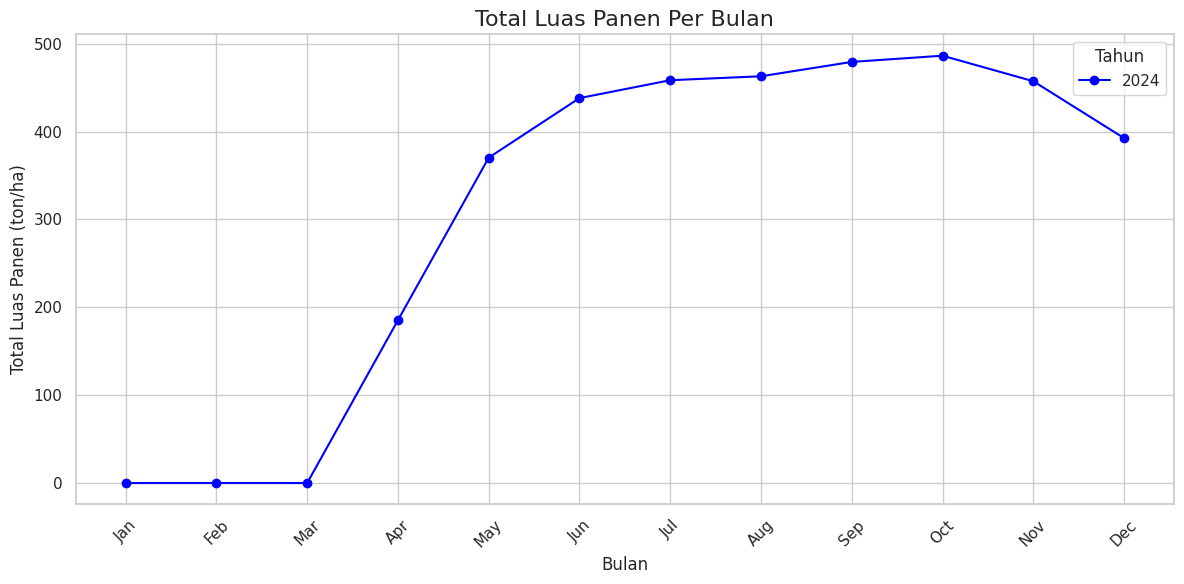

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya Seaborn
sns.set_theme(style="whitegrid")

# Membuat plot garis
plt.figure(figsize=(12, 6))

# Filter data untuk masing-masing tahun
data_2024 = df_total_harvest[df_total_harvest["Tahun"] == "2024"]
data_2025 = df_total_harvest[df_total_harvest["Tahun"] == "2025"]

# Plot untuk tahun 2024
plt.plot(
    data_2024["Bulan"],
    data_2024["Total Luas Panen (ton/ha)"],
    marker="o",
    label="2024",
    color="blue"
)

# # Plot untuk tahun 2025
# plt.plot(
#     data_2025["Bulan"],
#     data_2025["Total Luas Panen (ton/ha)"],
#     marker="o",
#     label="2025",
#     color="orange"
# )

# Menambahkan label dan judul
plt.title("Total Luas Panen Per Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Luas Panen (ton/ha)", fontsize=12)
plt.legend(title="Tahun")
plt.xticks(rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()


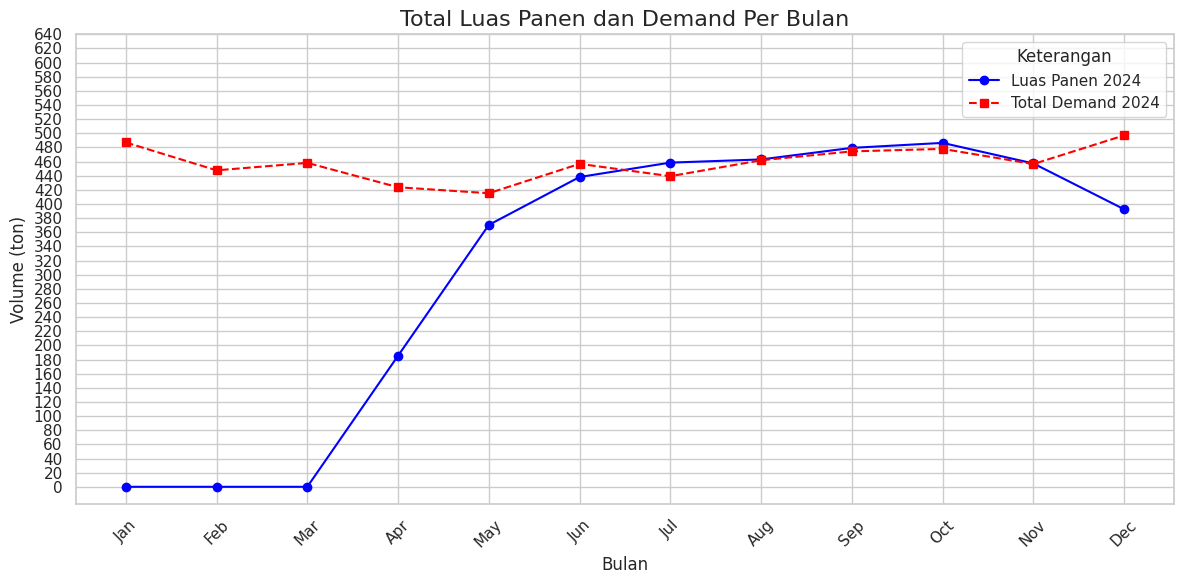

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya Seaborn
sns.set_theme(style="whitegrid")

# Membuat plot garis
plt.figure(figsize=(12, 6))

# Filter data untuk masing-masing tahun
data_2024 = df_total_harvest[df_total_harvest["Tahun"] == "2024"]
data_2025 = df_total_harvest[df_total_harvest["Tahun"] == "2025"]

# Plot untuk tahun 2024
plt.plot(
    data_2024["Bulan"],
    data_2024["Total Luas Panen (ton/ha)"],
    marker="o",
    label="Luas Panen 2024",
    color="blue"
)

# # Plot untuk tahun 2025
# plt.plot(
#     data_2025["Bulan"],
#     data_2025["Total Luas Panen (ton/ha)"],
#     marker="o",
#     label="Luas Panen 2025",
#     color="orange"
# )

# Plot untuk Total Demand
plt.plot(
    data_2024["Bulan"],
    df_total_demand["Total Demand (ton)"],
    marker="s",
    linestyle="--",
    label="Total Demand 2024",
    color="red"
)

# Menyesuaikan skala sumbu y
y_ticks = np.arange(0, 650, 20)  # Misalnya, dari 0 hingga 60 dengan interval 10
plt.yticks(ticks=y_ticks, labels=[str(int(tick)) for tick in y_ticks])

# Menambahkan label dan judul
plt.title("Total Luas Panen dan Demand Per Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Volume (ton)", fontsize=12)
plt.legend(title="Keterangan")
plt.xticks(rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()


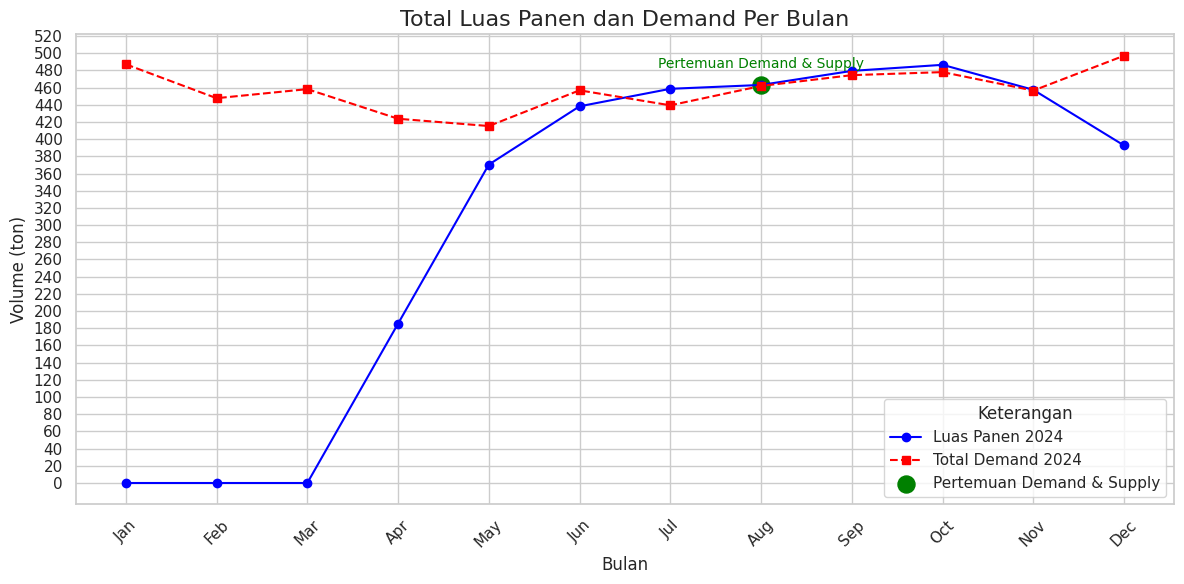

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mengatur gaya Seaborn
sns.set_theme(style="whitegrid")

# Membuat plot garis
plt.figure(figsize=(12, 6))

# Filter data untuk masing-masing tahun
data_2024 = df_total_harvest[df_total_harvest["Tahun"] == "2024"]
data_2025 = df_total_harvest[df_total_harvest["Tahun"] == "2025"]

# Plot untuk tahun 2024
plt.plot(
    data_2024["Bulan"],
    data_2024["Total Luas Panen (ton/ha)"],
    marker="o",
    label="Luas Panen 2024",
    color="blue"
)

# Plot untuk Total Demand
plt.plot(
    data_2024["Bulan"],
    df_total_demand["Total Demand (ton)"],
    marker="s",
    linestyle="--",
    label="Total Demand 2024",
    color="red"
)

# Menyesuaikan skala sumbu y
y_ticks = np.arange(0, 650, 20)  # Misalnya, dari 0 hingga 650 dengan interval 20
plt.yticks(ticks=y_ticks, labels=[str(int(tick)) for tick in y_ticks])

# Menambahkan titik besar pada bulan Agustus
bulan_agustus = "Aug"  # Nama bulan Agustus sesuai format data
idx_agustus = data_2024["Bulan"].tolist().index(bulan_agustus)  # Mendapatkan indeks bulan Agustus
panen_agustus = data_2024["Total Luas Panen (ton/ha)"].iloc[idx_agustus]
demand_agustus = df_total_demand["Total Demand (ton)"].iloc[idx_agustus]

# Menambahkan titik besar di plot
plt.scatter(
    bulan_agustus,
    panen_agustus,
    color="green",
    s=150,  # Ukuran titik
    label="Pertemuan Demand & Supply"
)

# Menambahkan anotasi untuk titik tersebut
plt.text(
    bulan_agustus,
    panen_agustus + 20,  # Posisi teks di atas titik
    "Pertemuan Demand & Supply",
    color="green",
    fontsize=10,
    ha="center"
)

# Menambahkan label dan judul
plt.title("Total Luas Panen dan Demand Per Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Volume (ton)", fontsize=12)
plt.legend(title="Keterangan")
plt.xticks(rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()


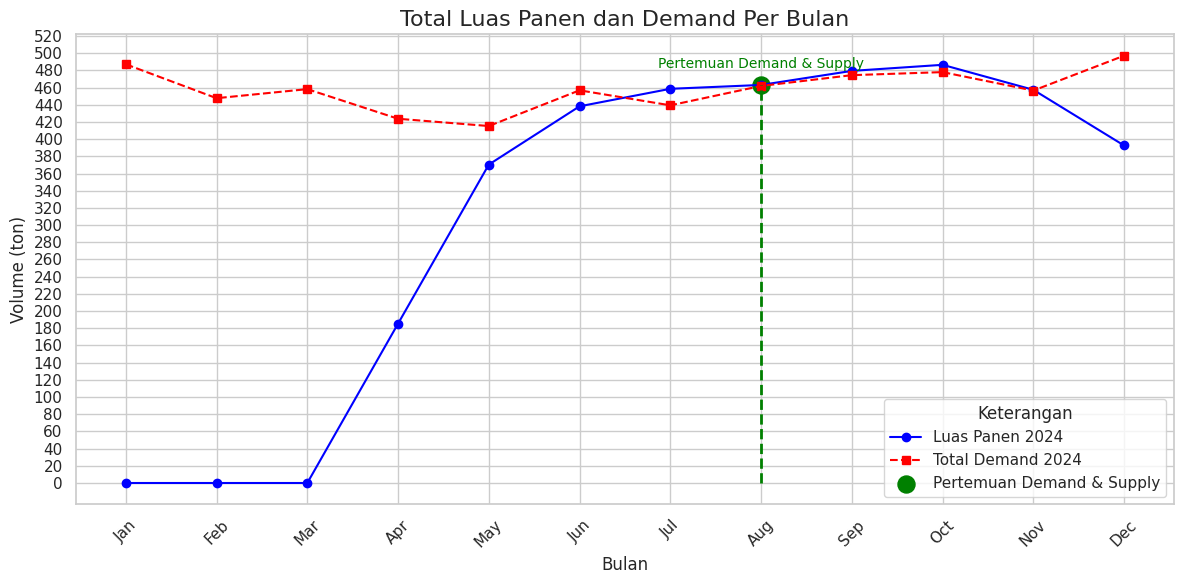

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mengatur gaya Seaborn
sns.set_theme(style="whitegrid")

# Membuat plot garis
plt.figure(figsize=(12, 6))

# Filter data untuk masing-masing tahun
data_2024 = df_total_harvest[df_total_harvest["Tahun"] == "2024"]
data_2025 = df_total_harvest[df_total_harvest["Tahun"] == "2025"]

# Plot untuk tahun 2024
plt.plot(
    data_2024["Bulan"],
    data_2024["Total Luas Panen (ton/ha)"],
    marker="o",
    label="Luas Panen 2024",
    color="blue"
)

# Plot untuk Total Demand
plt.plot(
    data_2024["Bulan"],
    df_total_demand["Total Demand (ton)"],
    marker="s",
    linestyle="--",
    label="Total Demand 2024",
    color="red"
)

# Menyesuaikan skala sumbu y
y_ticks = np.arange(0, 650, 20)  # Misalnya, dari 0 hingga 650 dengan interval 20
plt.yticks(ticks=y_ticks, labels=[str(int(tick)) for tick in y_ticks])

# Menambahkan titik besar pada bulan Agustus
bulan_agustus = "Aug"  # Nama bulan Agustus sesuai format data
idx_agustus = data_2024["Bulan"].tolist().index(bulan_agustus)  # Mendapatkan indeks bulan Agustus
panen_agustus = data_2024["Total Luas Panen (ton/ha)"].iloc[idx_agustus]
demand_agustus = df_total_demand["Total Demand (ton)"].iloc[idx_agustus]

# Menambahkan titik besar di plot
plt.scatter(
    bulan_agustus,
    panen_agustus,
    color="green",
    s=150,  # Ukuran titik
    label="Pertemuan Demand & Supply"
)

# Menambahkan anotasi untuk titik tersebut
plt.text(
    bulan_agustus,
    panen_agustus + 20,  # Posisi teks di atas titik
    "Pertemuan Demand & Supply",
    color="green",
    fontsize=10,
    ha="center"
)

# Menambahkan garis putus-putus ke bawah
plt.plot(
    [bulan_agustus, bulan_agustus],
    [0, panen_agustus],
    linestyle="--",
    color="green",
    linewidth=2
)

# Menambahkan label dan judul
plt.title("Total Luas Panen dan Demand Per Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Volume (ton)", fontsize=12)
plt.legend(title="Keterangan")
plt.xticks(rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()

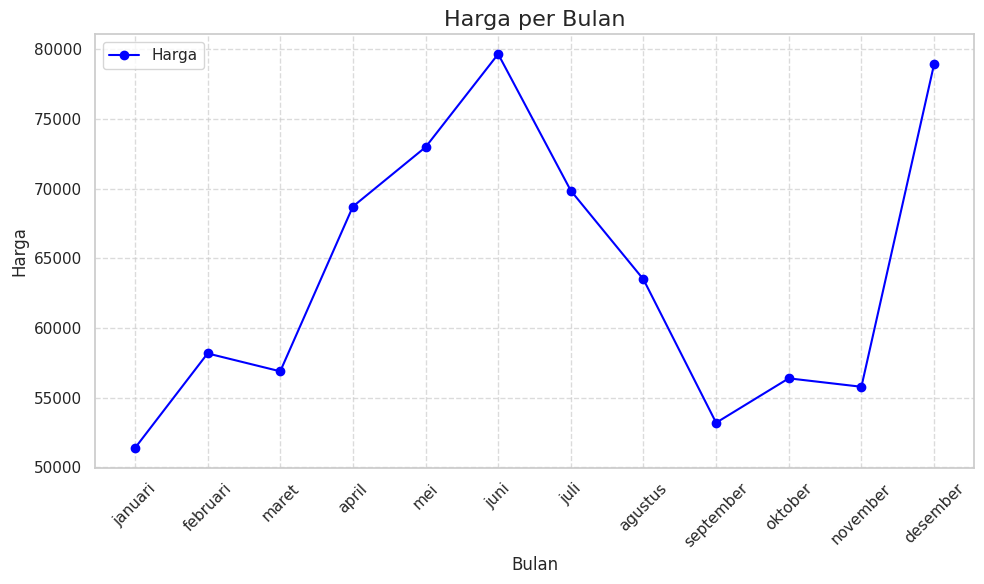

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data CSV
file_path = '/content/Harga cabai 2024 - Sheet1.csv'  # Ganti dengan nama file Anda
data = pd.read_csv(file_path)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(data['bulan'], data['harga'], marker='o', linestyle='-', color='blue', label='Harga')

# Menambahkan judul dan label
plt.title('Harga per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


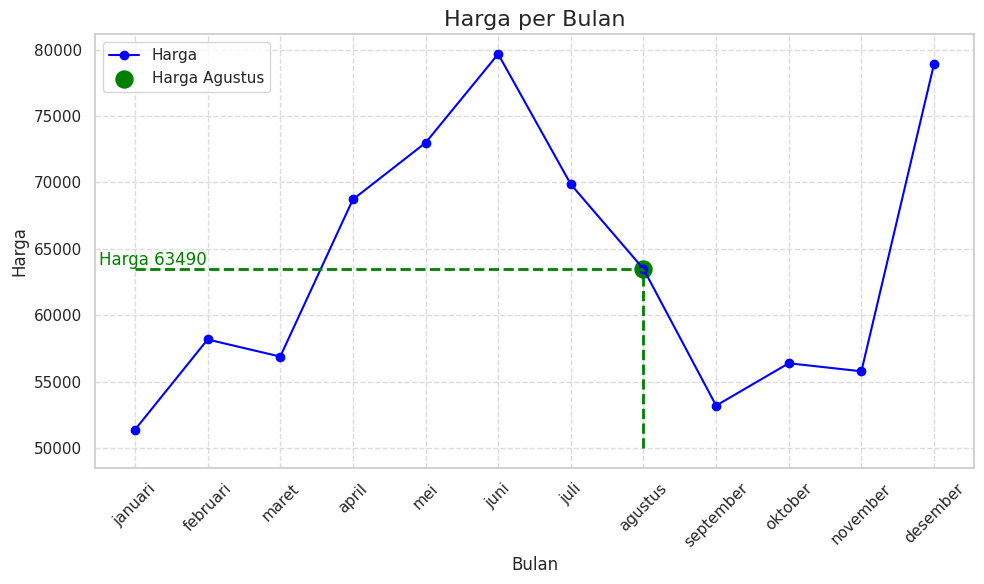

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data CSV
file_path = '/content/Harga cabai 2024 - Sheet1.csv'  # Ganti dengan nama file Anda
data = pd.read_csv(file_path)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(data['bulan'], data['harga'], marker='o', linestyle='-', color='blue', label='Harga')

# Menambahkan garis horizontal ke kiri pada bulan Agustus
bulan_agustus = "agustus"  # Nama bulan Agustus sesuai format data
idx_agustus = data['bulan'].tolist().index(bulan_agustus)  # Mendapatkan indeks bulan Agustus
harga_agustus = data['harga'].iloc[idx_agustus]

# Menambahkan garis horizontal ke kiri (dari bulan Agustus ke x=0)
plt.plot([0, idx_agustus], [harga_agustus, harga_agustus], linestyle="--", color="green", linewidth=2)

# Menambahkan titik besar pada bulan Agustus
plt.scatter(bulan_agustus, harga_agustus, color="green", s=150, label="Harga Agustus")

# Menambahkan keterangan harga di sumbu y untuk bulan Agustus
plt.text(
    -0.5,  # Posisi horizontal teks sedikit ke kiri agar tidak tumpang tindih dengan grafik
    harga_agustus,  # Posisi vertikal pada harga Agustus
    f'Harga {harga_agustus}',  # Teks harga
    color="green",
    fontsize=12,
    va="bottom",  # Menyelaraskan teks dengan sumbu Y (vertikal)
    ha="left"    # Menyelaraskan teks ke kanan
)

plt.vlines(
    x=idx_agustus,  # Posisi x pada bulan Agustus
    ymin=50000,  # Garis mulai dari y = 0 (sumbu x)
    ymax=harga_agustus,  # Garis berakhir di harga bulan Agustus
    color="green",  # Warna garis vertikal
    linestyle="--",  # Gaya garis putus-putus
    linewidth=2  # Ketebalan garis
)


# Menambahkan label dan judul
plt.title('Harga per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


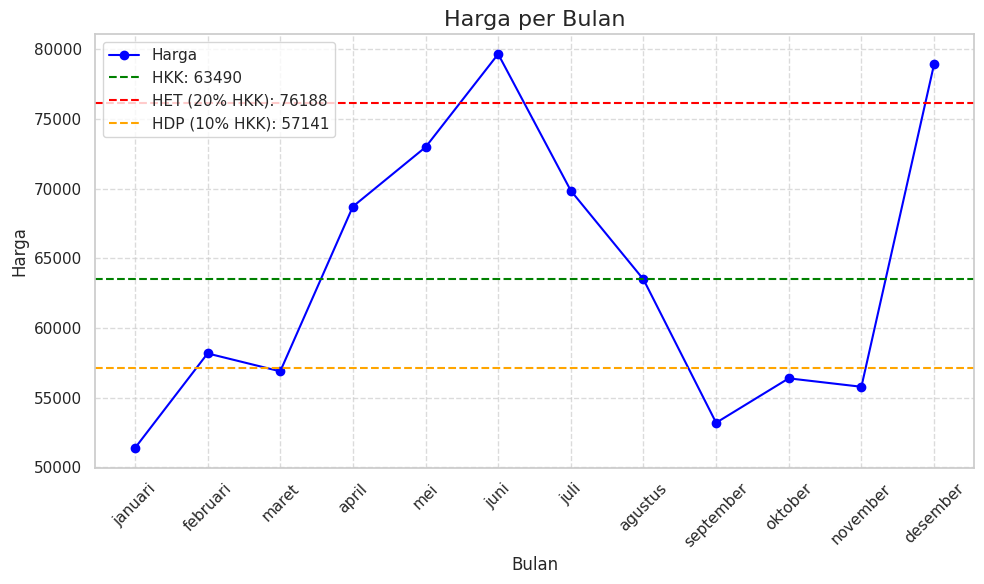

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data CSV
file_path = '/content/Harga cabai 2024 - Sheet1.csv'  # Ganti dengan nama file Anda
data = pd.read_csv(file_path)

# Menjaga urutan bulan
bulan_urutan = [
    "januari", "februari", "maret", "april", "mei", "juni",
    "juli", "agustus", "september", "oktober", "november", "desember"
]
data['bulan'] = pd.Categorical(data['bulan'], categories=bulan_urutan, ordered=True)
data = data.sort_values('bulan')

# Menentukan nilai harga bulan Juni
HKK = data.loc[data['bulan'] == 'agustus', 'harga'].values[0]
HET = (HKK * 0.2) + HKK  # Harga 20% dari harga Juni
HDP = HKK - (HKK * 0.1)# Harga dikurangi 10% dari harga Juni

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(data['bulan'], data['harga'], marker='o', linestyle='-', color='blue', label='Harga')

# Menambahkan garis HKK
plt.axhline(HKK, color='green', linestyle='--', label=f'HKK: {HKK}')

# Menambahkan garis HET
plt.axhline(HET, color='red', linestyle='--', label=f'HET (20% HKK): {HET:.0f}')

# Menambahkan garis HDP
plt.axhline(HDP, color='orange', linestyle='--', label=f'HDP (10% HKK): {HDP:.0f}')

# Menambahkan judul dan label
plt.title('Harga per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()
